In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tabulate import tabulate

In [7]:
url = "/kaggle/input/k-means-clustering/Mall_Customers.csv"
df = pd.read_csv(url)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [18]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("Standardized features (first 5 rows):")
print(tabulate(features_scaled[:5], headers=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], tablefmt='psql'))


Standardized features (first 5 rows):
+-----------+----------------------+--------------------------+
|       Age |   Annual Income (k$) |   Spending Score (1-100) |
|-----------+----------------------+--------------------------|
| -1.42457  |             -1.739   |                -0.434801 |
| -1.28104  |             -1.739   |                 1.1957   |
| -1.3528   |             -1.70083 |                -1.71591  |
| -1.1375   |             -1.70083 |                 1.04042  |
| -0.563369 |             -1.66266 |                -0.39598  |
+-----------+----------------------+--------------------------+


In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features_scaled)
df['Cluster'] = kmeans.labels_

print("Dataframe with cluster labels (first 5 rows):")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

Dataframe with cluster labels (first 5 rows):
+----+--------------+----------+-------+----------------------+--------------------------+-----------+------------+----------+
|    |   CustomerID | Gender   |   Age |   Annual Income (k$) |   Spending Score (1-100) |   Cluster |       PCA1 |     PCA2 |
|----+--------------+----------+-------+----------------------+--------------------------+-----------+------------+----------|
|  0 |            1 | Male     |    19 |                   15 |                       39 |         2 | -0.61572   | -1.76348 |
|  1 |            2 | Male     |    21 |                   15 |                       81 |         2 | -1.66579   | -1.82075 |
|  2 |            3 | Female   |    20 |                   16 |                        6 |         3 |  0.337862  | -1.6748  |
|  3 |            4 | Female   |    23 |                   16 |                       77 |         2 | -1.45657   | -1.77243 |
|  4 |            5 | Female   |    31 |                   17 |  

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


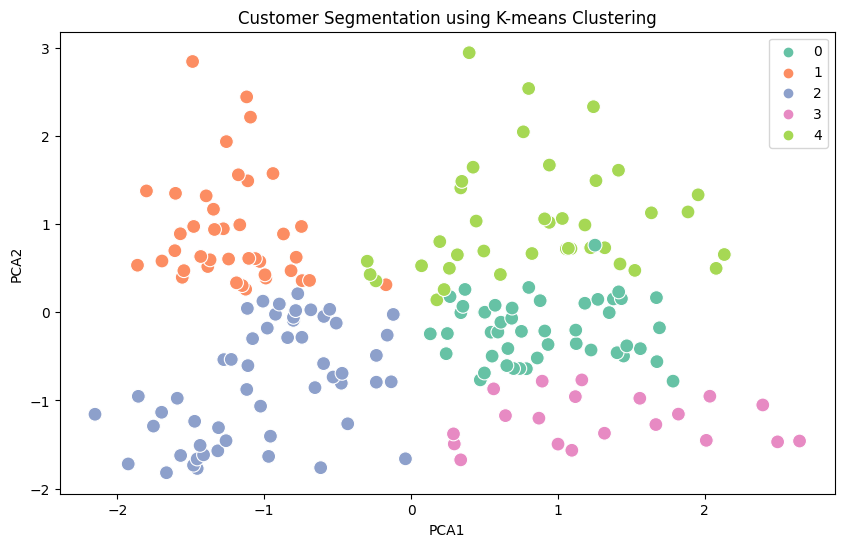

In [20]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()